In [87]:
pip install tk


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
# Visualizations
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [2]:
X_train = pd.read_csv('X_train.csv')

In [3]:
X_test = pd.read_csv('X_test.csv')

In [4]:
y_train = pd.read_csv('y_train.csv')

In [5]:
y_test = pd.read_csv('y_test.csv')

In [6]:
LRModel=LogisticRegression(solver='lbfgs', max_iter=7600)
LRModel.fit(X_train,y_train)

LogisticRegression(max_iter=7600)

In [7]:
y_pred = LRModel.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, LRModel.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.6818181818181818
Precision: 0.6875
Recall: 0.6666666666666666
F1-Score: 0.676923076923077
ROC-AUC: 0.7951229466380982


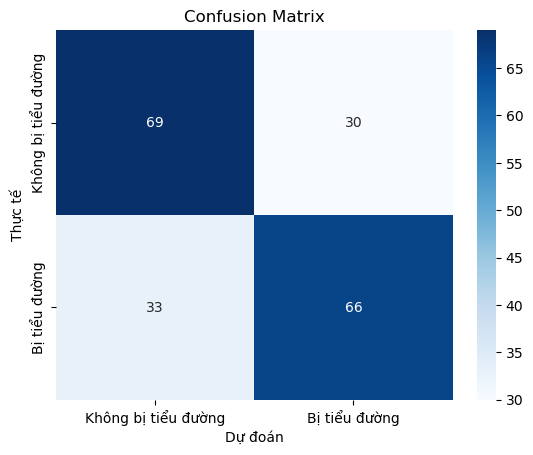

              precision    recall  f1-score   support

 No Diabetes       0.68      0.70      0.69        99
    Diabetes       0.69      0.67      0.68        99

    accuracy                           0.68       198
   macro avg       0.68      0.68      0.68       198
weighted avg       0.68      0.68      0.68       198



In [9]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không bị tiểu đường', 'Bị tiểu đường'],
            yticklabels=['Không bị tiểu đường', 'Bị tiểu đường'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()

# Báo cáo phân loại
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
log_reg = LogisticRegression()

#Định nghĩa các giá trị siêu tham số cần thử nghiệm
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình với các siêu tham số
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)


Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-validation Score: 0.7593555900621118


In [13]:
from sklearn.linear_model import LogisticRegression
best_params = grid_search.best_params_
# Khởi tạo mô hình Logistic Regression với các siêu tham số tối ưu
LRModel_Hyper = LogisticRegression(C=best_params['C'],
                           penalty=best_params['penalty'],
                           solver=best_params['solver'],
                           max_iter=best_params['max_iter']
                                  )

# Huấn luyện mô hình trên toàn bộ tập huấn luyện
LRModel_Hyper.fit(X_train, y_train)


LogisticRegression(C=1, solver='liblinear')

In [14]:
y_pred_Hyper = LRModel_Hyper.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred_Hyper)
precision = precision_score(y_test, y_pred_Hyper)
recall = recall_score(y_test, y_pred_Hyper)
f1 = f1_score(y_test, y_pred_Hyper)
roc_auc = roc_auc_score(y_test, LRModel.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.6919191919191919
Precision: 0.6938775510204082
Recall: 0.6868686868686869
F1-Score: 0.6903553299492385
ROC-AUC: 0.7951229466380982


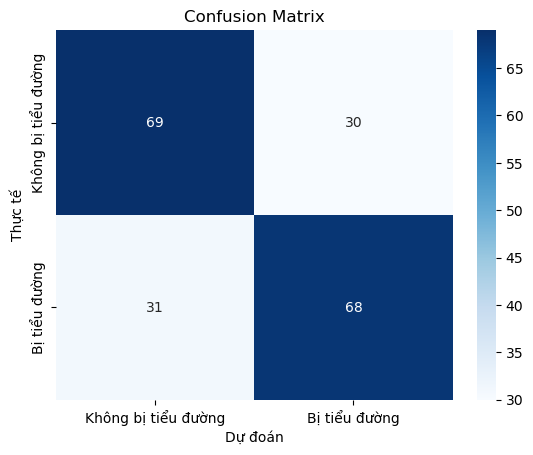

              precision    recall  f1-score   support

 No Diabetes       0.69      0.70      0.69        99
    Diabetes       0.69      0.69      0.69        99

    accuracy                           0.69       198
   macro avg       0.69      0.69      0.69       198
weighted avg       0.69      0.69      0.69       198



In [16]:
cm = confusion_matrix(y_test, y_pred_Hyper)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không bị tiểu đường', 'Bị tiểu đường'],
            yticklabels=['Không bị tiểu đường', 'Bị tiểu đường'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()

# Báo cáo phân loại
print(classification_report(y_test, y_pred_Hyper, target_names=['No Diabetes', 'Diabetes']))

In [17]:
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(LRModel_Hyper, file)